In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import imblearn
from imblearn.under_sampling import NearMiss

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df = pd.read_excel('Data.xls')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
65530,9,CASH_IN,50529.410,C1132444754,6493984.640,6544514.050,C1956477953,308079.990,0.000,0,0
65531,9,CASH_IN,58429.170,C2059144571,6544514.050,6602943.220,C1137371968,4724976.110,6392871.310,0,0
65532,9,CASH_IN,114387.370,C687420794,6602943.220,6717330.590,C135254299,122030.090,7642.720,0,0
65533,9,CASH_IN,149249.380,C279481988,6717330.590,6866579.970,C527482085,322658.030,198216.730,0,0


In [7]:
df.shape

(65535, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            65535 non-null  int64  
 1   type            65535 non-null  object 
 2   amount          65535 non-null  float64
 3   nameOrig        65535 non-null  object 
 4   oldbalanceOrg   65535 non-null  float64
 5   newbalanceOrig  65535 non-null  float64
 6   nameDest        65535 non-null  object 
 7   oldbalanceDest  65535 non-null  float64
 8   newbalanceDest  65535 non-null  float64
 9   isFraud         65535 non-null  int64  
 10  isFlaggedFraud  65535 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 5.5+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000
mean,7.820,162953.707,856009.737,871751.066,845475.200,1177693.997,0.002,0.000
std,1.913,330399.088,2648526.520,2686490.677,2398166.474,2877348.940,0.040,0.000
min,1.000,0.630,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.000,8736.590,0.000,0.000,0.000,0.000,0.000,0.000
50%,8.000,41852.830,19866.000,0.000,10910.630,13707.110,0.000,0.000
75%,9.000,197301.345,161837.380,185324.720,499536.345,947554.330,0.000,0.000
max,9.000,10000000.000,33797391.550,34008736.980,31306920.440,31976992.090,1.000,0.000


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [12]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

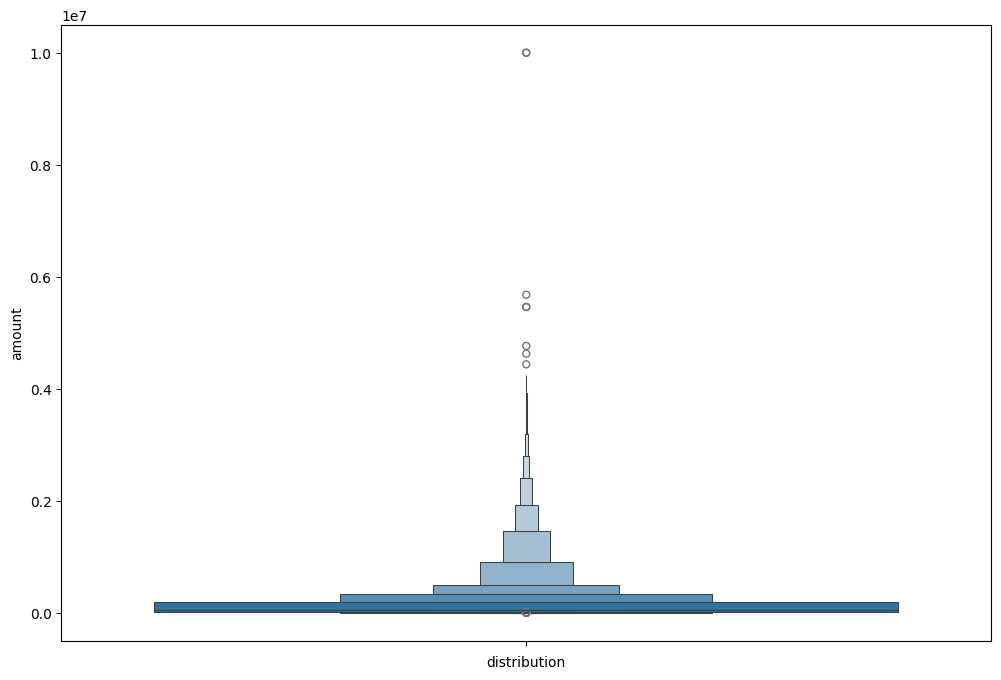

In [13]:
sns.boxenplot(df['amount'])
plt.ylabel('amount')
plt.xlabel('distribution')
plt.show()

Text(0.5, 0, 'distribution')

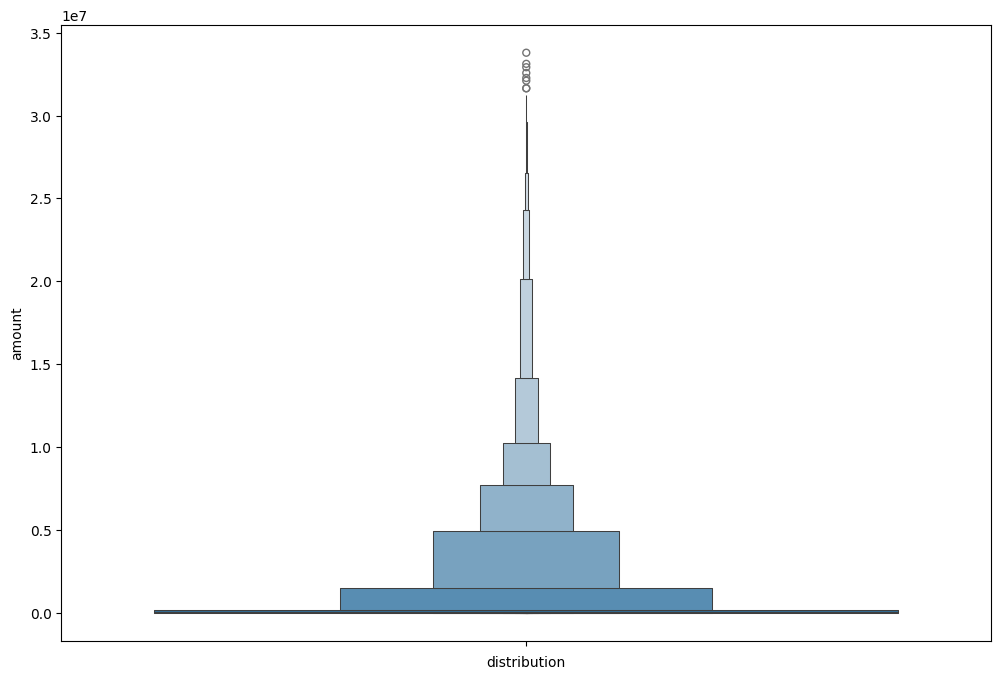

In [14]:
sns.boxenplot(df['oldbalanceOrg'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

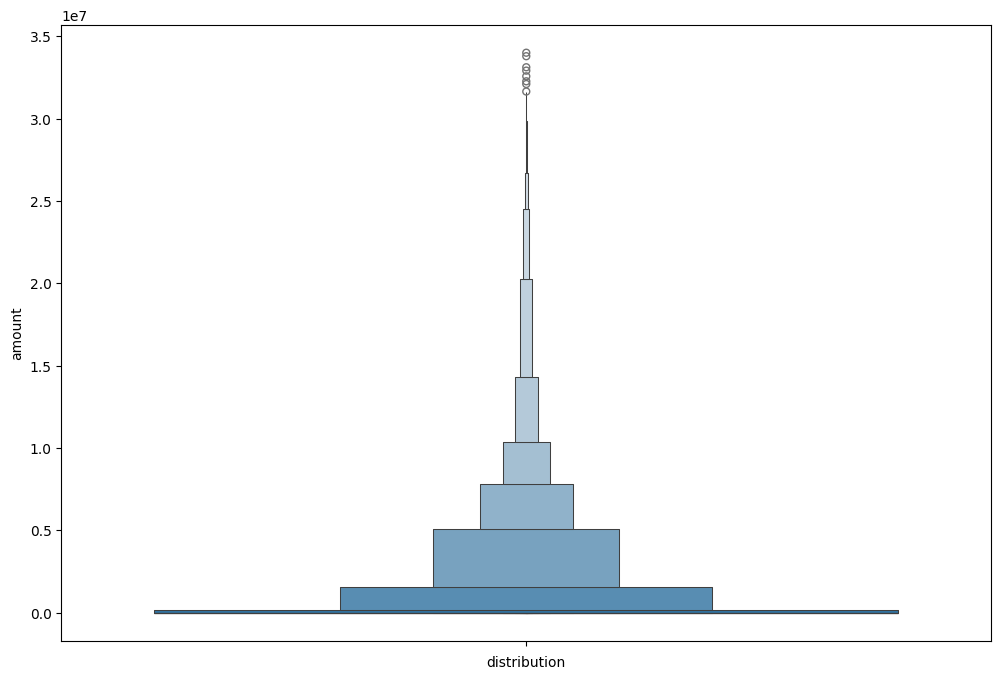

In [15]:
sns.boxenplot(df['newbalanceOrig'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

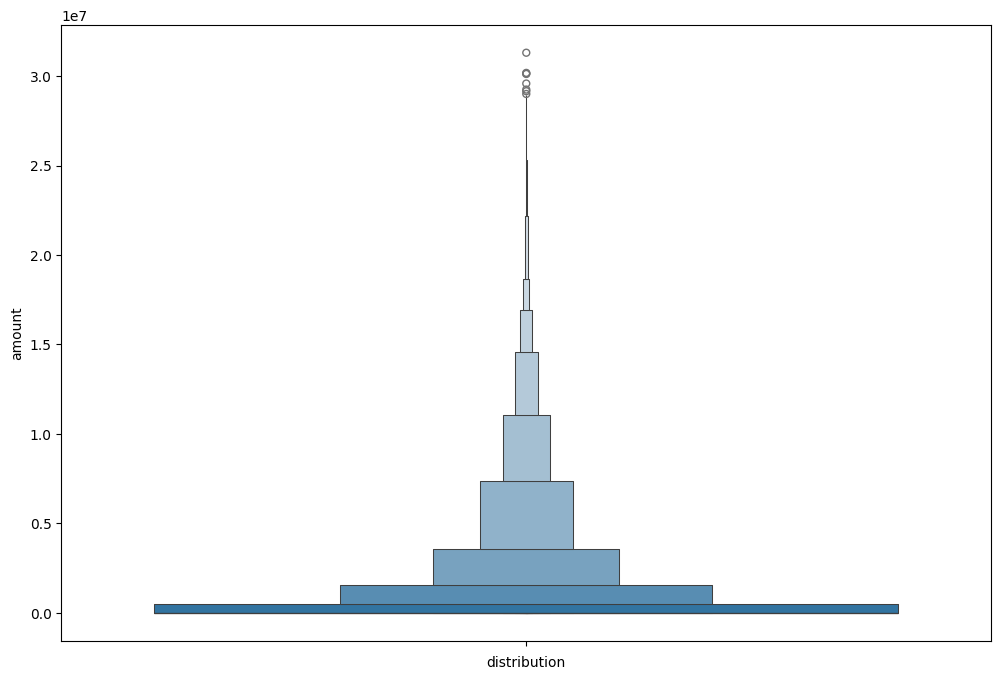

In [16]:
sns.boxenplot(df['oldbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

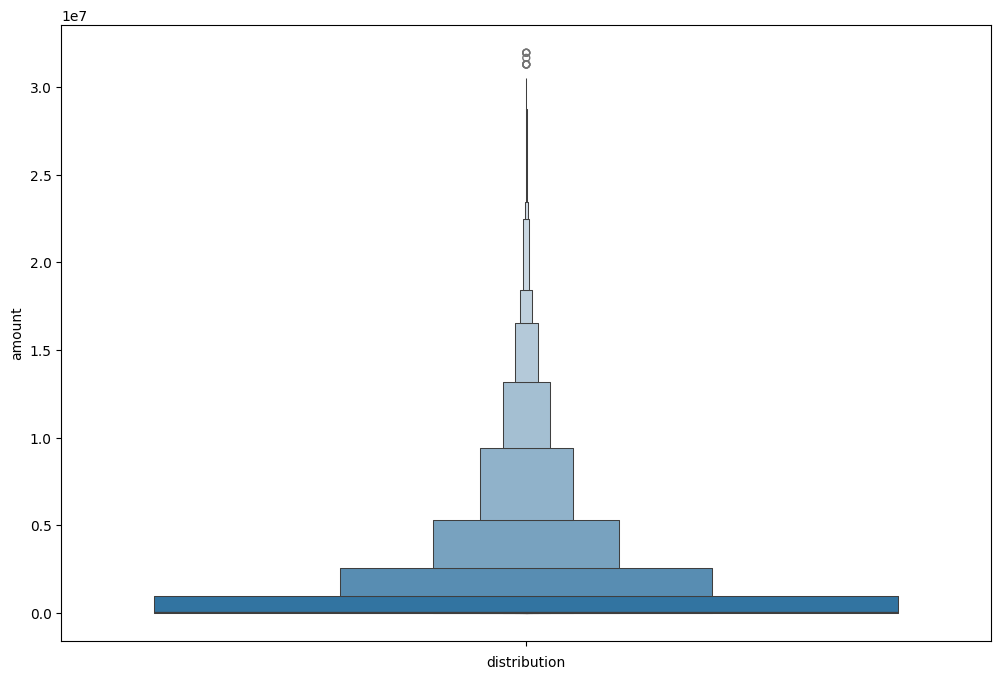

In [17]:
sns.boxenplot(df['newbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

In [18]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [19]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')

In [20]:
df.groupby('isFraud').describe().T

isFraud                        0           1
step           count   65430.000     105.000
               mean        7.824       5.343
               std         1.909       2.703
               min         1.000       1.000
               25%         8.000       3.000
               50%         8.000       6.000
               75%         9.000       8.000
               max         9.000       9.000
amount         count   61057.000      85.000
               mean    95571.870   78972.505
               std    117470.138  114294.171
               min         0.630     164.000
               25%      8000.090   13704.000
               50%     30345.230   25071.460
               75%    159687.130   86070.170
               max    479828.790  441445.580
oldbalanceOrg  count   53261.000      84.000
               mean    40610.482   60758.319
               std     74114.115   92088.966
               min         0.000       0.000
               25%         0.000   10565.000
               50%      7151.950   21825.500
               75%     43471.000   60726.570
               max    404264.490  361559.690
newbalanceOrig count   53669.000     104.000
               mean    41036.984    4258.824
               std     88154.657   43431.651
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%     29026.680       0.000
               max    463293.360  442917.670
oldbalanceDest count   55767.000     102.000
               mean   153167.695   32937.646
               std    279702.445  122793.536
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%    188097.415    8379.820
               max   1248805.730  894760.680
newbalanceDest count   56706.000      99.000
               mean   305106.598  199019.811
               std    547237.967  464302.101
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%    356154.785  130793.570
               max   2367602.930 2046918.800
isFlaggedFraud count   65430.000     105.000
               mean        0.000       0.000
               std         0.000       0.000
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%         0.000       0.000
               max         0.000       0.000

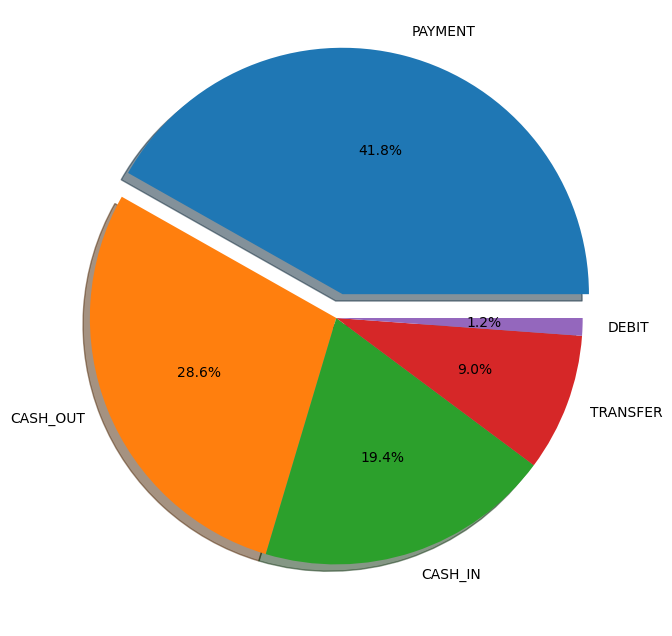

In [21]:
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

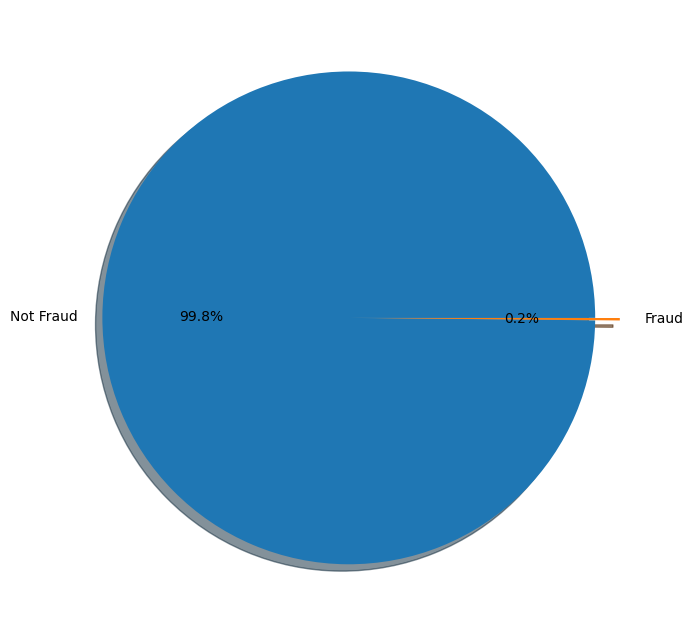

In [22]:
values = df['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

In [23]:
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,479828.790
1,CASH_IN,479701.400
2,TRANSFER,479573.430
3,DEBIT,121693.480
4,PAYMENT,69478.990


<Axes: xlabel='type', ylabel='amount'>

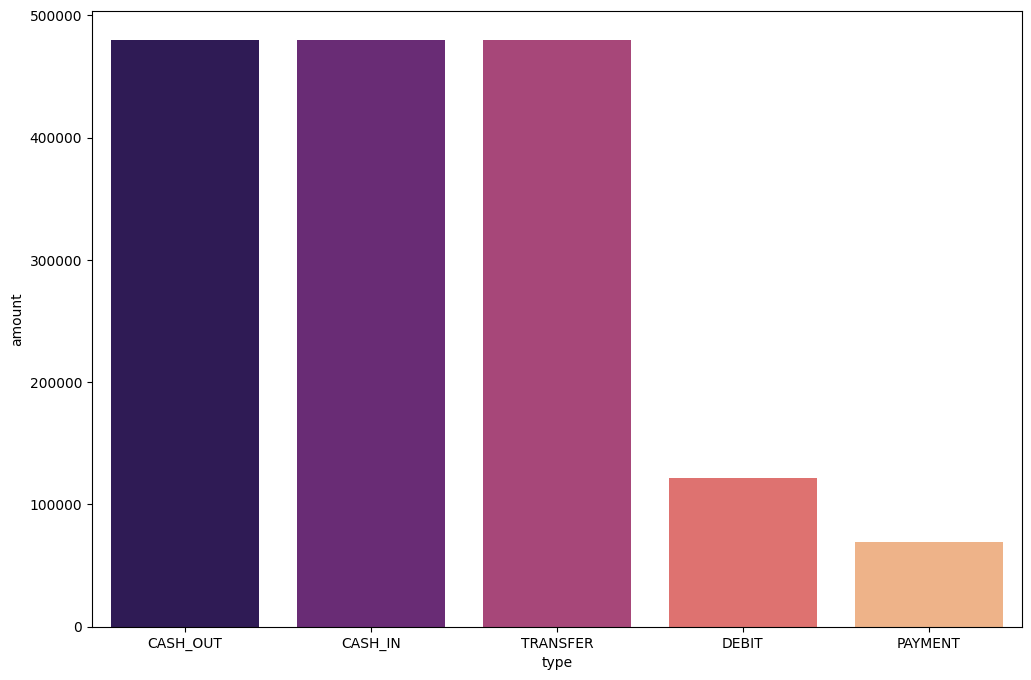

In [24]:
sns.barplot(x='type',y='amount',data=max_amount_type,palette='magma')

<Axes: xlabel='amount', ylabel='Density'>

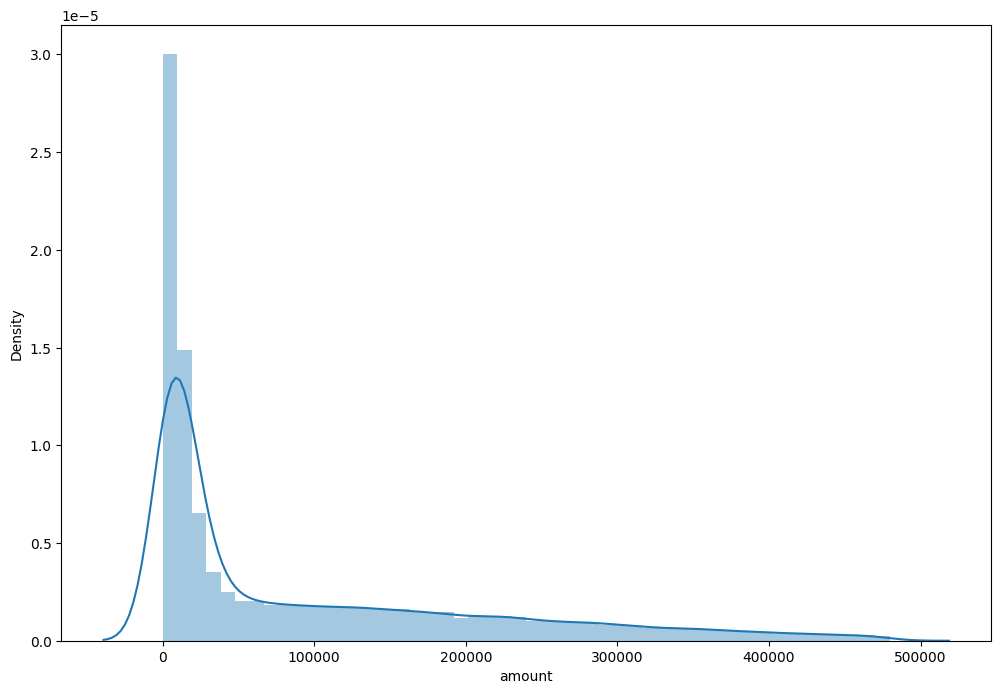

In [26]:
sns.distplot(df['amount'],bins=50)

<Axes: xlabel='amount', ylabel='Density'>

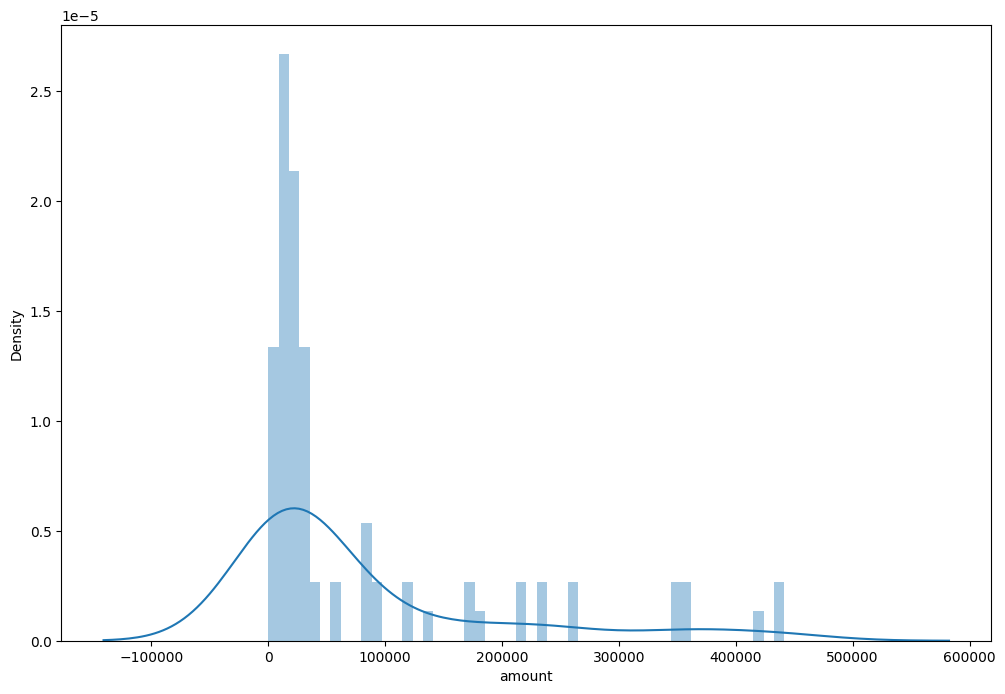

In [27]:
positive_fraud_case = df[df['isFraud']==1]
sns.distplot(positive_fraud_case['amount'],bins=50)

<Axes: xlabel='amount', ylabel='Density'>

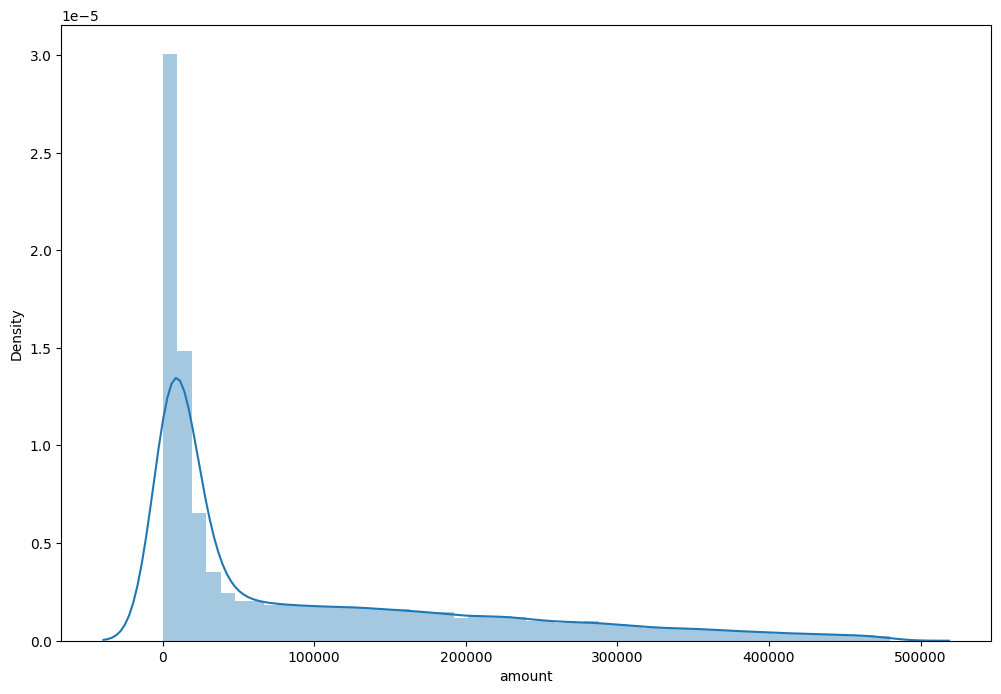

In [28]:
non_fraud_case = df[df['isFraud']==0]
sns.distplot(non_fraud_case['amount'],bins=50)

In [29]:
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

In [30]:
payment_types = pd.get_dummies(df['type'],prefix='type',drop_first=True)
df = pd.concat([df,payment_types],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0,0,False,False,True,False
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0,0,False,False,True,False
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0,False,False,False,True
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0,True,False,False,False
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0,0,False,False,True,False


In [31]:
df.drop('type',axis=1,inplace=True)

In [32]:
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(np.int64)
df['type_DEBIT'] = df['type_DEBIT'].astype(np.int64)
df['type_PAYMENT'] = df['type_PAYMENT'].astype(np.int64)
df['type_TRANSFER'] = df['type_TRANSFER'].astype(np.int64)

In [33]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [34]:
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x,y)

In [35]:
X = x_nm
y = y_nm
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,stratify=y,random_state=2022)

In [36]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print('ROC AUC Score:',roc_auc_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9864864864864865
F1 Score: 0.9866666666666667
Confusion Matrix:
 [[36  1]
 [ 0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [40]:
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))

Confusion Matrix:
 [[37  0]
 [ 1 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

ROC AUC Score: 0.9864864864864865
F1 Score: 0.9863013698630136
Accuracy Score: 0.9864864864864865


In [41]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [43]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 1.0
Confusion Matrix:
 [[37  0]
 [ 0 37]]
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Accuracy Score: 1.0


In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [46]:
print("ROC AUC Score:",roc_auc_score(y_test,gnb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,gnb_pred))
print("F1 Score:",f1_score(y_test,gnb_pred))
print("Classification Report:\n",classification_report(y_test,gnb_pred))
print("Accuracy Score:",accuracy_score(y_test,gnb_pred))

ROC AUC Score: 0.9594594594594595
Confusion Matrix:
 [[36  1]
 [ 2 35]]
F1 Score: 0.958904109589041
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.97      0.95      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy Score: 0.9594594594594594


In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

In [49]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9459459459459459
Confusion Matrix:
 [[37  0]
 [ 4 33]]
F1 Score: 0.9428571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.89      0.94        37

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74

Accuracy Score: 0.9459459459459459


In [50]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [51]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [52]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[36  1]
 [ 0 37]]
F1 Score: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [53]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [55]:
print("ROC AUC Score:",roc_auc_score(y_test,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))
print("Accuracy Score:",accuracy_score(y_test,xgb_pred))

ROC AUC Score: 1.0
Confusion Matrix:
 [[37  0]
 [ 0 37]]
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Accuracy Score: 1.0


In [56]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [57]:
grid_search_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
grid_search_svm.best_estimator_

SVC(C=10, gamma=1)

In [59]:
svm = SVC(C=10000,gamma=1)
svm.fit(X_train,y_train)

SVC(C=10000, gamma=1)

In [60]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [61]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9594594594594594
Confusion Matrix:
 [[37  0]
 [ 3 34]]
F1 Score: 0.9577464788732394
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.92      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy Score: 0.9594594594594594


In [62]:
param_grid = {'n_estimators': [100,200,300,400,500],
              'criterion': ['gini','entropy'],
              'class_weight': ['balanced','balanced_subsample']
             }

In [63]:
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)
random_search_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END class_weight=balanced, criterion=entropy, n_estimators=200;, score=0.929 total time=   0.9s
[CV 2/5] END class_weight=balanced, criterion=entropy, n_estimators=200;, score=1.000 total time=   0.7s
[CV 3/5] END class_weight=balanced, criterion=entropy, n_estimators=200;, score=0.963 total time=   0.5s
[CV 4/5] END class_weight=balanced, criterion=entropy, n_estimators=200;, score=1.000 total time=   0.3s
[CV 5/5] END class_weight=balanced, criterion=entropy, n_estimators=200;, score=1.000 total time=   0.3s
[CV 1/5] END class_weight=balanced, criterion=gini, n_estimators=400;, score=0.929 total time=   0.5s
[CV 2/5] END class_weight=balanced, criterion=gini, n_estimators=400;, score=1.000 total time=   0.4s
[CV 3/5] END class_weight=balanced, criterion=gini, n_estimators=400;, score=0.963 total time=   0.4s
[CV 4/5] END class_weight=balanced, criterion=gini, n_estimators=400;, score=1.000 total time=   0.5s
[CV 5/

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=3)

In [64]:
rfc_pred = random_search_rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [65]:
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("Accuracy Score:",accuracy_score(y_test,rfc_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[37  0]
 [ 1 36]]
F1 Score: 0.9863013698630136
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [66]:
param_grid = {'C': [1.0,2.0,3.0,4.0,5.0],
              'solver': ['liblinear','sag','saga'],
              'class_weight': ['balanced']}

In [67]:
random_search_lr = RandomizedSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)
random_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=5.0, class_weight=balanced, solver=saga;, score=0.929 total time=   0.0s
[CV 2/5] END C=5.0, class_weight=balanced, solver=saga;, score=1.000 total time=   0.0s
[CV 3/5] END C=5.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 4/5] END C=5.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 5/5] END C=5.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 1/5] END C=2.0, class_weight=balanced, solver=liblinear;, score=0.929 total time=   0.0s
[CV 2/5] END C=2.0, class_weight=balanced, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/5] END C=2.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 4/5] END C=2.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 5/5] END C=2.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 1/5] END C=4.0, class_weight=b

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                                        'class_weight': ['balanced'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=3)

In [68]:
lr = LogisticRegression(C=5.0,solver='saga',class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=5.0, class_weight='balanced', solver='saga')

In [69]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [70]:
print("ROC AUC Score:",roc_auc_score(y_test,lr_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,lr_pred))
print("F1 Score:",f1_score(y_test,lr_pred))
print("Classification Report:\n",classification_report(y_test,lr_pred))
print("Accuracy Score:",accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[36  1]
 [ 0 37]]
F1 Score: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [71]:
param_grid = {'criterion': ['gini','entropy'], 'splitter': ['best','random']}

In [72]:
random_search_dtree = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3)
random_search_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.929 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.926 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.963 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.963 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.929 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.963 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.963 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.963 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.929 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [73]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [74]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [75]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 0.972972972972973
Confusion Matrix:
 [[37  0]
 [ 2 35]]
F1 Score: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.95      0.97        37

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74

Accuracy Score: 0.972972972972973


In [76]:
param_grid = {'n_neighbors': [1,2,3,4,5],
             'weights': ['uniform','distance'],
             'algorithm': ['auto','ball_tree','kd_tree','brute'],
             'p': [1,2]}

In [77]:
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
random_search_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=0.929 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.893 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.963 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=kd_

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [78]:
knn_pred = random_search_knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [79]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9594594594594594
Confusion Matrix:
 [[37  0]
 [ 3 34]]
F1 Score: 0.9577464788732394
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.92      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy Score: 0.9594594594594594


In [80]:
print("Performance of ML Models:")
print('Predictive Accuracy of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Predictive Accuracy of K Neighbors Classifier:',str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print('Predictive Accuracy of Support Vector Classifier:',str(np.round(accuracy_score(y_test,svm_pred)*100,2)) + '%')
print('Predictive Accuracy of Decision Tree Classifier:',str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print('Predictive Accuracy of Random Forest Classifier:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Predictive Accuracy of Gaussian Naive Bayes:',str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print('Predictive Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')

Performance of ML Models:
Predictive Accuracy of Logistic Regression: 98.65%
Predictive Accuracy of K Neighbors Classifier: 95.95%
Predictive Accuracy of Support Vector Classifier: 95.95%
Predictive Accuracy of Decision Tree Classifier: 97.3%
Predictive Accuracy of Random Forest Classifier: 98.65%
Predictive Accuracy of Gaussian Naive Bayes: 95.95%
Predictive Accuracy of XGBoost Classifier: 100.0%


In [ ]:
import os, shutil, joblib, json, sys
import pandas as pd, numpy as np

print("Working dir:", os.getcwd())

try:
    import sklearn, xgboost
    print("sklearn version:", sklearn.__version__)
    print("xgboost version:", xgboost.__version__)
except Exception as e:
    print("Warning: couldn't import sklearn/xgboost:", e)

OLD = "fraud_pipeline.pkl"
if os.path.exists(OLD):
    backup = OLD + ".old"
    print(f"Moving existing {OLD} -> {backup}")
    if os.path.exists(backup):
        os.remove(backup)
    os.replace(OLD, backup)
if 'df' not in globals():
    raise RuntimeError("DataFrame `df` not found in this notebook. Load your dataset into `df` first (the same df used to train).")

df.columns = df.columns.str.strip().str.replace('\u200b','', regex=False)

type_onehot_cols = [c for c in df.columns if c.startswith('type_')]
if 'type' not in df.columns and len(type_onehot_cols) > 0:
    print("Reconstructing 'type' from one-hot columns:", type_onehot_cols)
    def _reconstruct_type(r):
        for c in type_onehot_cols:
            val = r.get(c, 0)
            try:
                if int(val) == 1:
                    return c.replace('type_','')
            except Exception:
                if val == 1 or val == 1.0 or str(val).strip().lower() == 'true':
                    return c.replace('type_','')
        return 'OTHER'
    df = df.copy()
    df['type'] = df.apply(_reconstruct_type, axis=1)

numeric_features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']
categorical_features = ['type']

missing_nums = [c for c in numeric_features if c not in df.columns]
if missing_nums:
    raise KeyError(f"Missing numeric columns in df: {missing_nums} — make sure you loaded the correct df.")

if 'isFraud' not in df.columns:
    raise KeyError("Target column 'isFraud' not found in df.")

from sklearn.model_selection import train_test_split
feature_cols = [c for c in numeric_features + categorical_features if c in df.columns]
X = df[feature_cols].copy()
y = df['isFraud'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Prepared X_train shape:", X_train.shape, "y_train counts:", y_train.value_counts().to_dict())

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
try:
    cat_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    cat_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [c for c in numeric_features if c in X_train.columns]),
        ('cat', cat_enc, [c for c in categorical_features if c in X_train.columns])
    ],
    remainder='drop'
)

from xgboost import XGBClassifier
model_obj = None

if 'final_xgb' in globals():
    model_obj = final_xgb
    print("Using in-memory final_xgb.")
else:
    if os.path.exists("final_xgboost_fraud_model.pkl"):
        print("Loading final_xgboost_fraud_model.pkl from disk...")
        try:
            model_obj = joblib.load("final_xgboost_fraud_model.pkl")
            print("Loaded model_obj from final_xgboost_fraud_model.pkl")
        except Exception as e:
            print("Failed to load final_xgboost_fraud_model.pkl:", e)
            model_obj = None

if model_obj is None:
    scale_pos_weight = float(len(y_train[y_train==0]) / max(1, len(y_train[y_train==1])))
    print("Creating new XGBClassifier with scale_pos_weight =", scale_pos_weight)
    model_obj = XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.01,
        max_depth=4,
        n_estimators=100,
        subsample=0.8,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
else:
    scale_pos_weight = float(len(y_train[y_train==0]) / max(1, len(y_train[y_train==1])))
    print("Using loaded model; computed scale_pos_weight =", scale_pos_weight)

from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([('preprocessor', preprocessor), ('model', model_obj)])

print("Fitting pipeline (this can take a moment)...")
full_pipeline.fit(X_train, y_train)
print("Pipeline fitted.")

PIPE_OUT = "fraud_pipeline.pkl"
joblib.dump(full_pipeline, PIPE_OUT)
print("Saved new pipeline to:", PIPE_OUT)

meta = {
    'best_threshold': None,
    'scale_pos_weight': float(scale_pos_weight),
    'sklearn_version': None,
    'xgboost_version': None,
    'python_version': sys.version
}
try:
    import sklearn, xgboost
    meta['sklearn_version'] = sklearn.__version__
    meta['xgboost_version'] = xgboost.__version__
except:
    pass

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
y_proba = full_pipeline.predict_proba(X_test)[:,1]
ths = np.linspace(0.001, 0.999, 500)
best_t = 0.5
best_f1 = -1
for t in ths:
    f1 = f1_score(y_test, (y_proba >= t).astype(int), zero_division=0)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

meta['best_threshold'] = float(best_t)
with open("model_metadata.json","w") as f:
    json.dump(meta, f, indent=2)
print("Saved model_metadata.json:", meta)

print("Verifying joblib.load on the new pipeline...")
pipe_check = joblib.load(PIPE_OUT)
print("Loaded pipeline OK:", type(pipe_check))

sample = X_test.sample(1, random_state=1)
print("Sample row:\n", sample)
print("Predicted probability:", float(pipe_check.predict_proba(sample)[0,1]))
print("Best threshold by F1:", best_t, "best F1:", best_f1)


Working dir: c:\Users\kotha\OneDrive\Desktop\Smart_Card_Fraud_Detection
sklearn version: 1.5.2
xgboost version: 3.1.1
Moving existing fraud_pipeline.pkl -> fraud_pipeline.pkl.old
Reconstructing 'type' from one-hot columns: ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
Prepared X_train shape: (52428, 8) y_train counts: {0: 52344, 1: 84}
Creating new XGBClassifier with scale_pos_weight = 623.1428571428571
Fitting pipeline (this can take a moment)...
Pipeline fitted.
Saved new pipeline to: fraud_pipeline.pkl
Saved model_metadata.json: {'best_threshold': 0.787, 'scale_pos_weight': 623.1428571428571, 'sklearn_version': '1.5.2', 'xgboost_version': '3.1.1', 'python_version': '3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]'}
Verifying joblib.load on the new pipeline...
Loaded pipeline OK: <class 'sklearn.pipeline.Pipeline'>
Sample row:
        step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
48957     9 153980.360        688

ROC AUC: 0.9929695858169036
Approx AUPRC (trapz): 0.5565997444901033


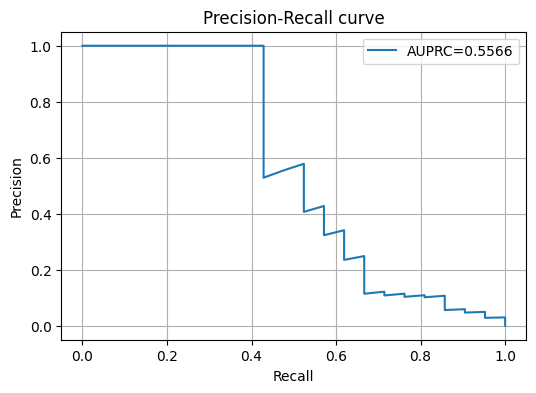


--- Threshold 0.100 ---
Accuracy: 0.0016021972991531242
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13086
           1       0.00      1.00      0.00        21

    accuracy                           0.00     13107
   macro avg       0.00      0.50      0.00     13107
weighted avg       0.00      0.00      0.00     13107

Confusion matrix:
 [[    0 13086]
 [    0    21]]

--- Threshold 0.250 ---
Accuracy: 0.7668421454184787
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     13086
           1       0.01      1.00      0.01        21

    accuracy                           0.77     13107
   macro avg       0.50      0.88      0.44     13107
weighted avg       1.00      0.77      0.87     13107

Confusion matrix:
 [[10030  3056]
 [    0    21]]

--- Threshold 0.500 ---
Accuracy: 0.9623865110246433
              precision    recall  f1-score   support

           0       1.00   

In [ ]:
import joblib, json, numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

pipe = joblib.load("fraud_pipeline.pkl")
meta = json.load(open("model_metadata.json"))

y_proba = pipe.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc)

prec, rec, ths = precision_recall_curve(y_test, y_proba)
ap = np.trapz(prec[::-1], rec[::-1])  
print("Approx AUPRC (trapz):", ap)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"AUPRC={ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.grid(True)
plt.legend()
plt.show()

cands = [0.1, 0.25, 0.5, meta.get("best_threshold", 0.5), 0.9]
cands = [float(t) for t in cands if t is not None]
for t in sorted(set(cands)):
    preds = (y_proba >= t).astype(int)
    print(f"\n--- Threshold {t:.3f} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))

from sklearn.metrics import f1_score
ths_line = np.linspace(0.001, 0.999, 500)
best_t, best_f1 = 0.5, -1
for t in ths_line:
    f1 = f1_score(y_test, (y_proba >= t).astype(int), zero_division=0)
    if f1 > best_f1:
        best_f1 = f1; best_t = t
print("\nBest threshold by F1:", best_t, "best F1:", best_f1)

meta['best_threshold'] = float(best_t)
with open("model_metadata.json","w") as f:
    json.dump(meta, f, indent=2)
print("Saved best_threshold to model_metadata.json:", best_t)  


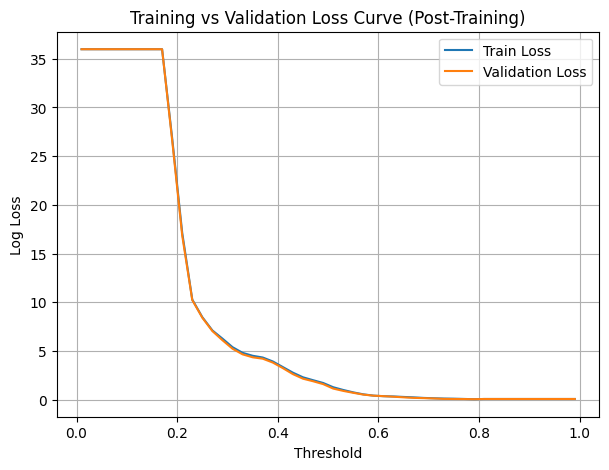

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

y_proba_train = pipe.predict_proba(X_train)[:,1]
y_proba_test  = pipe.predict_proba(X_test)[:,1]

thresholds = np.linspace(0.01, 0.99, 50)
train_losses, test_losses = [], []

for t in thresholds:
    train_pred = (y_proba_train >= t).astype(int)
    test_pred  = (y_proba_test  >= t).astype(int)
    
    train_losses.append(log_loss(y_train, train_pred, labels=[0,1]))
    test_losses.append(log_loss(y_test,  test_pred, labels=[0,1]))

plt.figure(figsize=(7,5))
plt.plot(thresholds, train_losses, label="Train Loss")
plt.plot(thresholds, test_losses,  label="Validation Loss")
plt.xlabel("Threshold")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss Curve (Post-Training)")
plt.legend()
plt.grid(True)
plt.show()


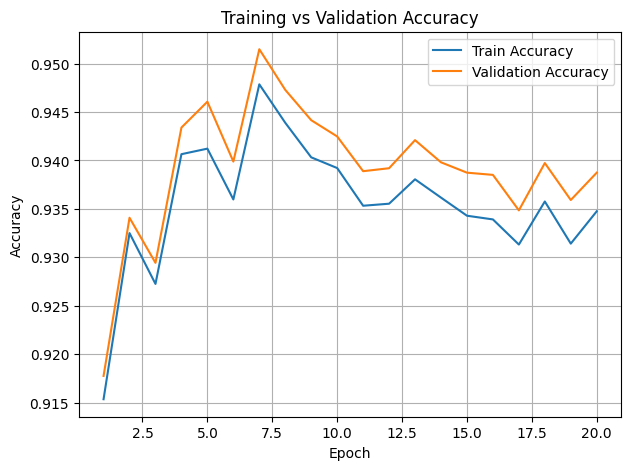

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_acc = []
val_acc = []

epochs = 20

for e in range(1, epochs + 1):
    pipe.set_params(model__n_estimators=e)
    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)
    y_pred_val = pipe.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_test, y_pred_val))

plt.figure(figsize=(7,5))
plt.plot(range(1, epochs+1), train_acc, label="Train Accuracy")
plt.plot(range(1, epochs+1), val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()
